# Import Libraries

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from urllib.parse import urlparse, parse_qs
from collections import Counter

C:\Users\Preetham\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
import pandas as urlphish_hyrde

urlphish_hyrd = urlphish_hyrde.read_csv('phishing_site_urls.csv')
urlphish_hyrd.head()

,URL,Label
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,bad
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,bad
3,mail.printakid.com/www.online.americanexpress....,bad
4,thewhiskeydregs.com/wp-content/themes/widescre...,bad


In [3]:
urlphish_hyrd.Label.unique()

array(['bad', 'good'], dtype=object)

In [4]:
urlphish_hyrd.Label.value_counts()

good    392924
bad     156422
Name: Label, dtype: int64

good kind of urls are more.

In [5]:
print('Phishing url data row = ',urlphish_hyrd.shape[0])
print('Phishing url data column = ',urlphish_hyrd.shape[1])

Phishing url data row =  549346
Phishing url data column =  2


In [6]:
urlphish_hyrd.describe()

,URL,Label
count,549346,549346
unique,507195,2
top,jhomitevd2abj3fk.tor2web.org/,good
freq,52,392924


In [7]:
urlphish_hyrd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549346 entries, 0 to 549345
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   URL     549346 non-null  object
 1   Label   549346 non-null  object
dtypes: object(2)
memory usage: 8.4+ MB


picking out null data 

In [8]:
urlphish_hyrd.isna().any()

URL      False
Label    False
dtype: bool

pick out duplicate data

In [9]:
urlphish_hyrd.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
549341     True
549342     True
549343     True
549344     True
549345     True
Length: 549346, dtype: bool

In [10]:
urlphish_hyrd_ph = urlphish_hyrd[urlphish_hyrd.duplicated()]
urlphish_hyrd_ph

,URL,Label
35413,bin/webscr?cmd=_login-,bad
45184,'www.allegropl.xaa.pl/enter_login.html?session...,bad
96132,stormpages.com/script/PHP.txt,bad
96449,penwithian.co.uk/hyperventilate/sporran.js,bad
96480,ukonline.hc0.me/Host.exe,bad
...,...,...
549341,23.227.196.215/,bad
549342,apple-checker.org/,bad
549343,apple-iclods.org/,bad
549344,apple-uptoday.org/,bad


In [11]:
urlphish_hyrd =urlphish_hyrd.drop_duplicates(subset=None, keep="first", inplace=False)
urlphish_hyrd.shape

(507196, 2)

# Exploratory data analysis

<AxesSubplot:title={'center':'phishing url label'}, ylabel='None'>

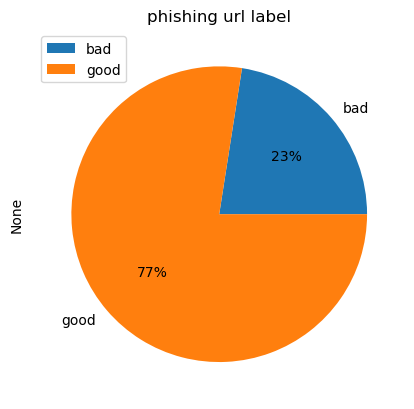

In [12]:
urlphish_hyrd.groupby('Label').size().plot(kind='pie', legend=True, autopct='%1.0f%%', title='phishing url label')

77% of good urls and 23% of bad urls present in the data.

In [13]:
## encoding the output clm 'Label'

from sklearn import preprocessing as urlphish_hyrdps
urlphish_hyrdps_O = urlphish_hyrdps.LabelEncoder()
urlphish_hyrd['Label']= urlphish_hyrdps_O.fit_transform(urlphish_hyrd['Label'])

In [14]:
urlphish_hyrd

,URL,Label
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,0
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,0
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,0
3,mail.printakid.com/www.online.americanexpress....,0
4,thewhiskeydregs.com/wp-content/themes/widescre...,0
...,...,...
516466,23.227.196.215/,0
516467,apple-checker.org/,0
516468,apple-iclods.org/,0
516469,apple-uptoday.org/,0


In [15]:
urlphish_hyrd['Label'].value_counts()

1    392897
0    114299
Name: Label, dtype: int64

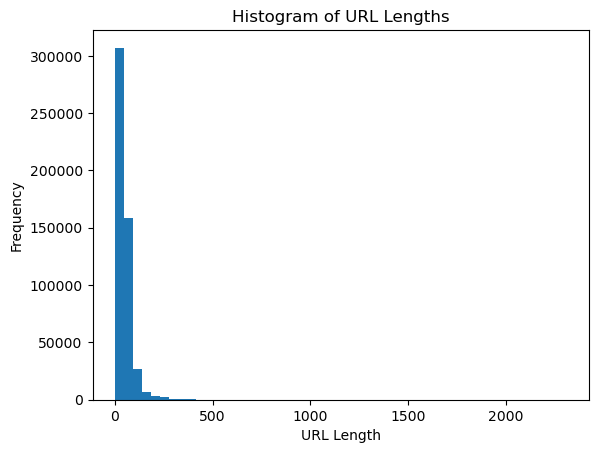

In [16]:
urlphish_hyrd['url_length'] = urlphish_hyrd['URL'].apply(len)
plt.hist(urlphish_hyrd['url_length'], bins=50)
plt.title('Histogram of URL Lengths')
plt.xlabel('URL Length')
plt.ylabel('Frequency')
plt.show()

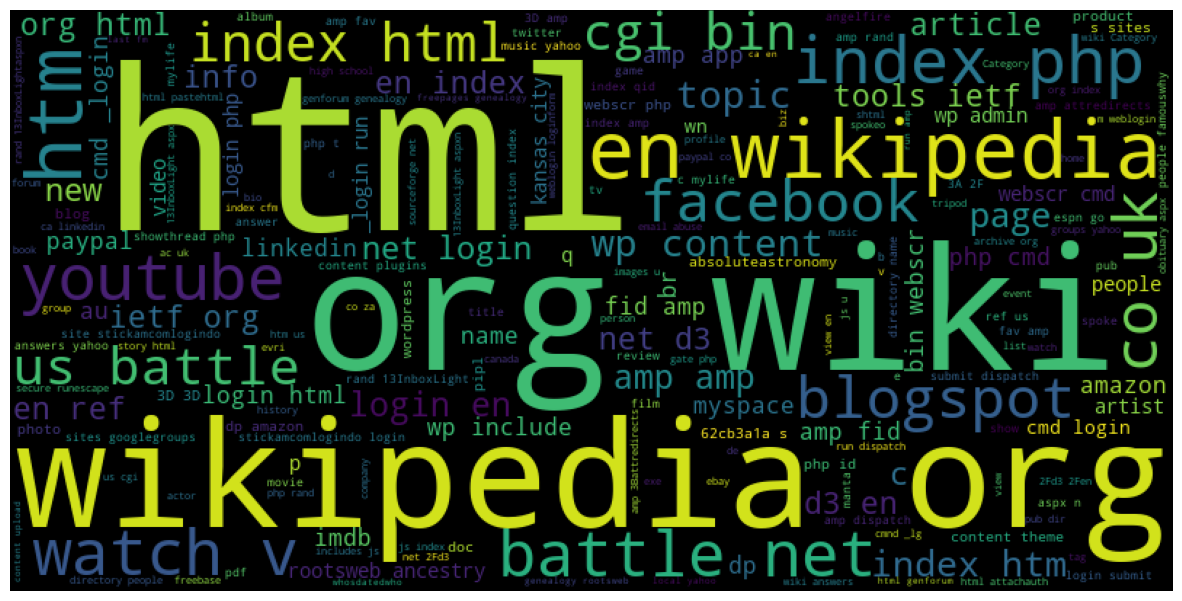

In [17]:
text = ' '.join(urlphish_hyrd['URL'])
wordcloud = WordCloud(width=800, height=400).generate(text)
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

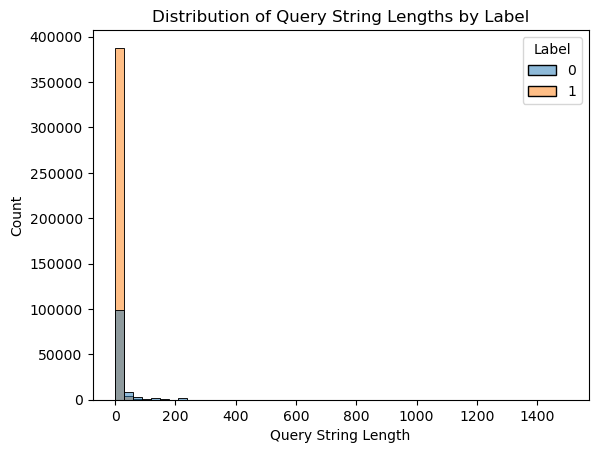

In [18]:
# Length of Query Strings in URLs
def query_length(url):
    parsed_url = urlparse(url)
    query = parse_qs(parsed_url.query)
    return sum(len(v) for values in query.values() for v in values)

urlphish_hyrd['query_length'] = urlphish_hyrd['URL'].apply(query_length)
sns.histplot(data=urlphish_hyrd, x='query_length', hue='Label', bins=50)
plt.title('Distribution of Query String Lengths by Label')
plt.xlabel('Query String Length')
plt.ylabel('Count')
plt.show()

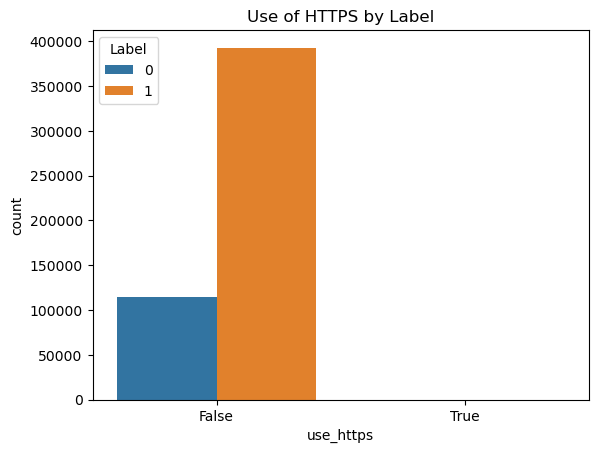

In [19]:
# Use of HTTPS
urlphish_hyrd['use_https'] = urlphish_hyrd['URL'].str.startswith('https')
sns.countplot(x='use_https', hue='Label', data=urlphish_hyrd)
plt.title('Use of HTTPS by Label')
plt.show()

In [20]:
urlphish_hyrd.to_csv('result_urlphish_hyrd.csv', index=False)